In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Load Image

In [ ]:
img = Image.open('/content/text_img.webp')

In [ ]:
img.mode

'RGB'

In [ ]:
img = img.convert('CMYK')

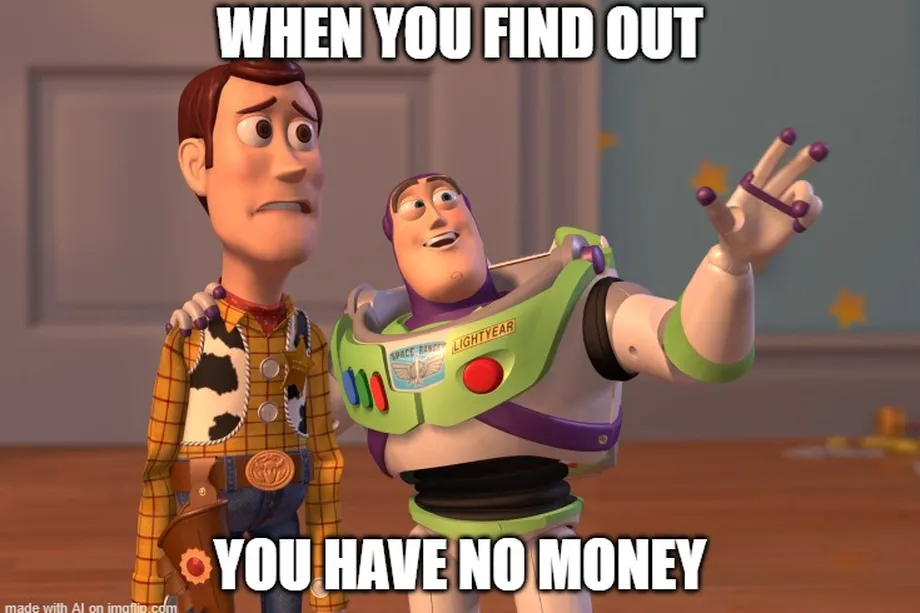

In [ ]:
def show_image(img):
    return img.convert('RGB')

show_image(img)

# Creating Share

## Step 1: Colour Decomposition

In [ ]:
def decompose_image(img):
    c_img = Image.new("CMYK", [d for d in img.size])
    m_img = Image.new("CMYK", [d for d in img.size])
    y_img = Image.new("CMYK", [d for d in img.size])


    N,M = img.size[0],img.size[1]
    for x in range(N):
        for y in range(M):
            pix = img.getpixel((x, y))

            c_img.putpixel((x, y),(pix[0],0,0,0))
            m_img.putpixel((x, y),(0,pix[1],0,0))
            y_img.putpixel((x, y),(0,0,pix[2],0))

    return c_img,m_img,y_img


In [ ]:
c_img, m_img, y_img = decompose_image(img)

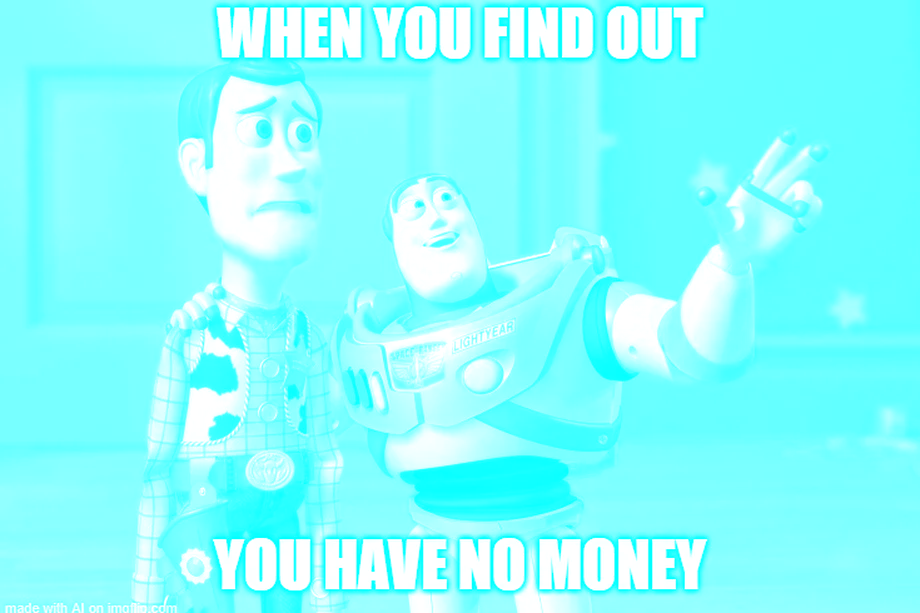

In [ ]:
show_image(c_img)

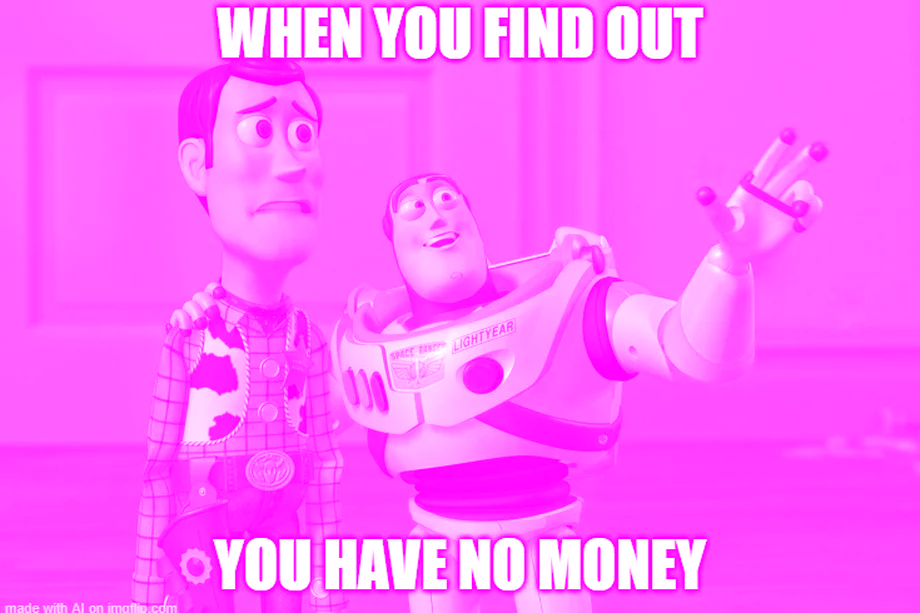

In [ ]:
show_image(m_img)

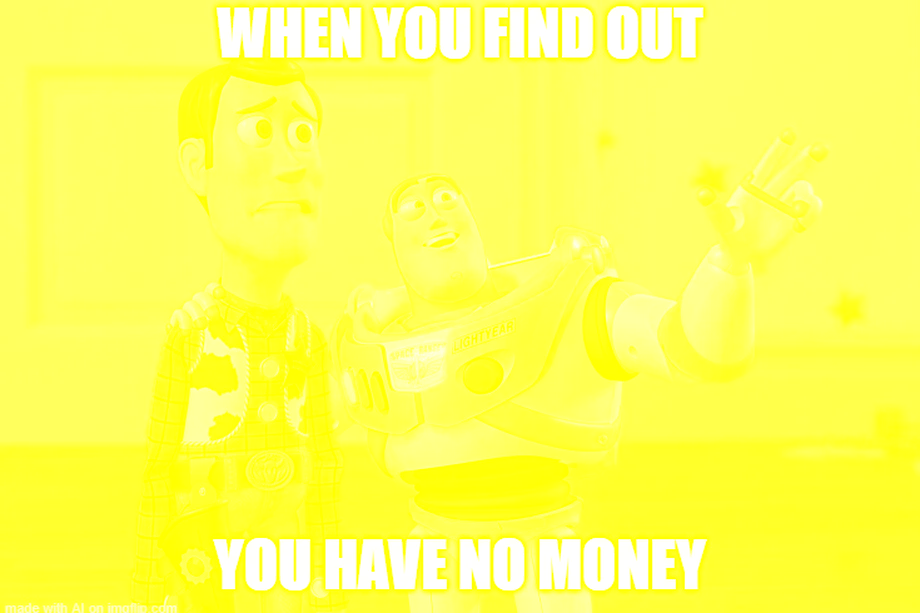

In [ ]:
show_image(y_img)

## Step 2: Create Halftone

In [ ]:
def create_halftone(c_img,m_img,y_img):

    c_img = c_img.convert('1')
    m_img = m_img.convert('1')
    y_img = y_img.convert('1')
    
    sz = c_img.size
    c_img_ht = Image.new("CMYK", c_img.size)
    m_img_ht = Image.new("CMYK", c_img.size)
    y_img_ht = Image.new("CMYK", c_img.size)

    for x in range(0, sz[0]):
        for y in range(0, sz[1]):

            c_pix = c_img.getpixel((x, y))
            m_pix = m_img.getpixel((x, y))
            y_pix = y_img.getpixel((x, y))

            c_img_ht.putpixel((x, y),(0,0,0,0))
            m_img_ht.putpixel((x, y),(0,0,0,0))
            y_img_ht.putpixel((x, y),(0,0,0,0))
            
            if c_pix:
                c_img_ht.putpixel((x, y),(255,0,0,0))

            if m_pix:
                m_img_ht.putpixel((x, y),(0,255,0,0))

            if y_pix:
                y_img_ht.putpixel((x, y),(0,0,255,0))
           
    return c_img_ht,m_img_ht,y_img_ht


In [ ]:
c_img_ht,m_img_ht,y_img_ht = create_halftone(c_img,m_img,y_img)

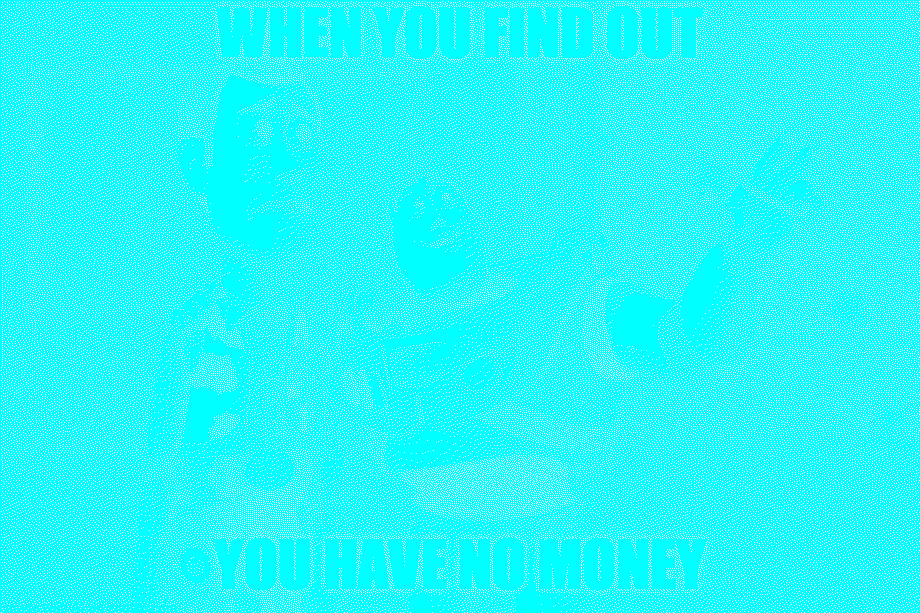

In [ ]:
show_image(c_img_ht)

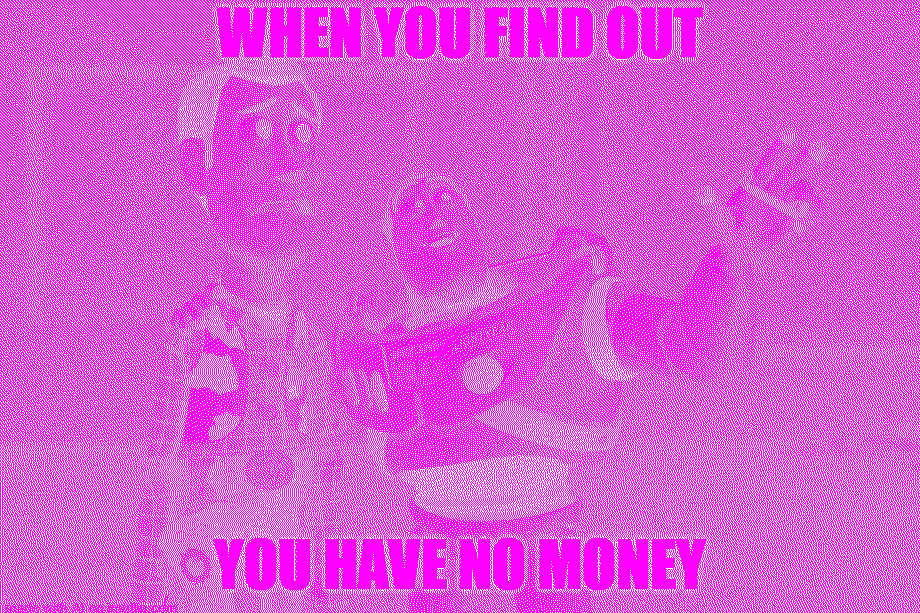

In [ ]:
show_image(m_img_ht)


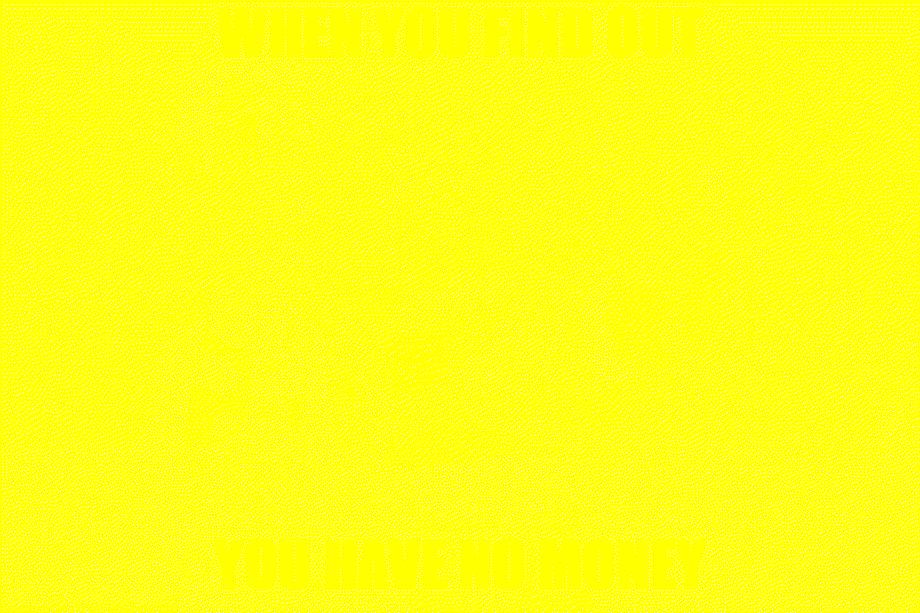

In [ ]:
show_image(y_img_ht)


## Create Shares

In [ ]:
import random
def update_pixel(share,pixels):

    # cyan, magenta, yellow, white
    colors = [(255,0,0,0),(0,255,0,0),(0,0,255,0),(0,0,0,0)]

    for i in range(4):
        share.putpixel(pixels[i],colors[i])
    
    
def create_shares(c_img_ht,m_img_ht,y_img_ht):

    sz = c_img_ht.size
    share1 = Image.new("CMYK", [d * 2 for d in sz])
    share2 = Image.new("CMYK", [d * 2 for d in sz])


    for x in range(0, sz[0]):
        for y in range(0, sz[1]):
            
            c_pix = c_img_ht.getpixel((x, y))[0]==255
            m_pix = m_img_ht.getpixel((x, y))[1]==255
            y_pix = y_img_ht.getpixel((x, y))[2]==255

            

            pixels_for_share1 = [(2*x,2*y),(2*x,2*y+1),(2*x+1,2*y),(2*x+1,2*y+1)]

            random.shuffle(pixels_for_share1)

            update_pixel(share1,pixels_for_share1)
           
            pixels_for_share2 = pixels_for_share1[:]

            sum = c_pix + m_pix + y_pix
            if sum==1:
                # swapping white and cyan pixel
                if c_pix:
                    pixels_for_share2[0],pixels_for_share2[3] = pixels_for_share2[3],pixels_for_share2[0]
                
                # swapping white and magenta pixel
                elif m_pix:
                    pixels_for_share2[1],pixels_for_share2[3] = pixels_for_share2[3],pixels_for_share2[1]
                
                # swapping white and yellow pixel
                elif y_pix:
                    pixels_for_share2[2],pixels_for_share2[3] = pixels_for_share2[3],pixels_for_share2[2]

                else:
                    assert(0)

            elif sum==2:
                # swapping cyan and magenta
                if c_pix and m_pix:
                    pixels_for_share2[0],pixels_for_share2[1] = pixels_for_share2[1],pixels_for_share2[0]

                # swapping cyan and yellow
                elif c_pix and y_pix:
                    pixels_for_share2[0],pixels_for_share2[2] = pixels_for_share2[2],pixels_for_share2[0]

                # swapping cyan and yellow
                elif m_pix and y_pix:
                    pixels_for_share2[1],pixels_for_share2[2] = pixels_for_share2[2],pixels_for_share2[1]
                else:
                    assert(0)

            elif sum==3:
                    i = pixels_for_share2.index((2*x,2*y))
                    j = pixels_for_share2.index((2*x+1,2*y+1))
                    pixels_for_share2[i],pixels_for_share2[j] = pixels_for_share2[j],pixels_for_share2[i]

                    i = pixels_for_share2.index((2*x+1,2*y))
                    j = pixels_for_share2.index((2*x,2*y+1))
                    pixels_for_share2[i],pixels_for_share2[j] = pixels_for_share2[j],pixels_for_share2[i]


            update_pixel(share2,pixels_for_share2)



    return share1,share2


In [ ]:
share1,share2 = create_shares(c_img_ht,m_img_ht,y_img_ht)

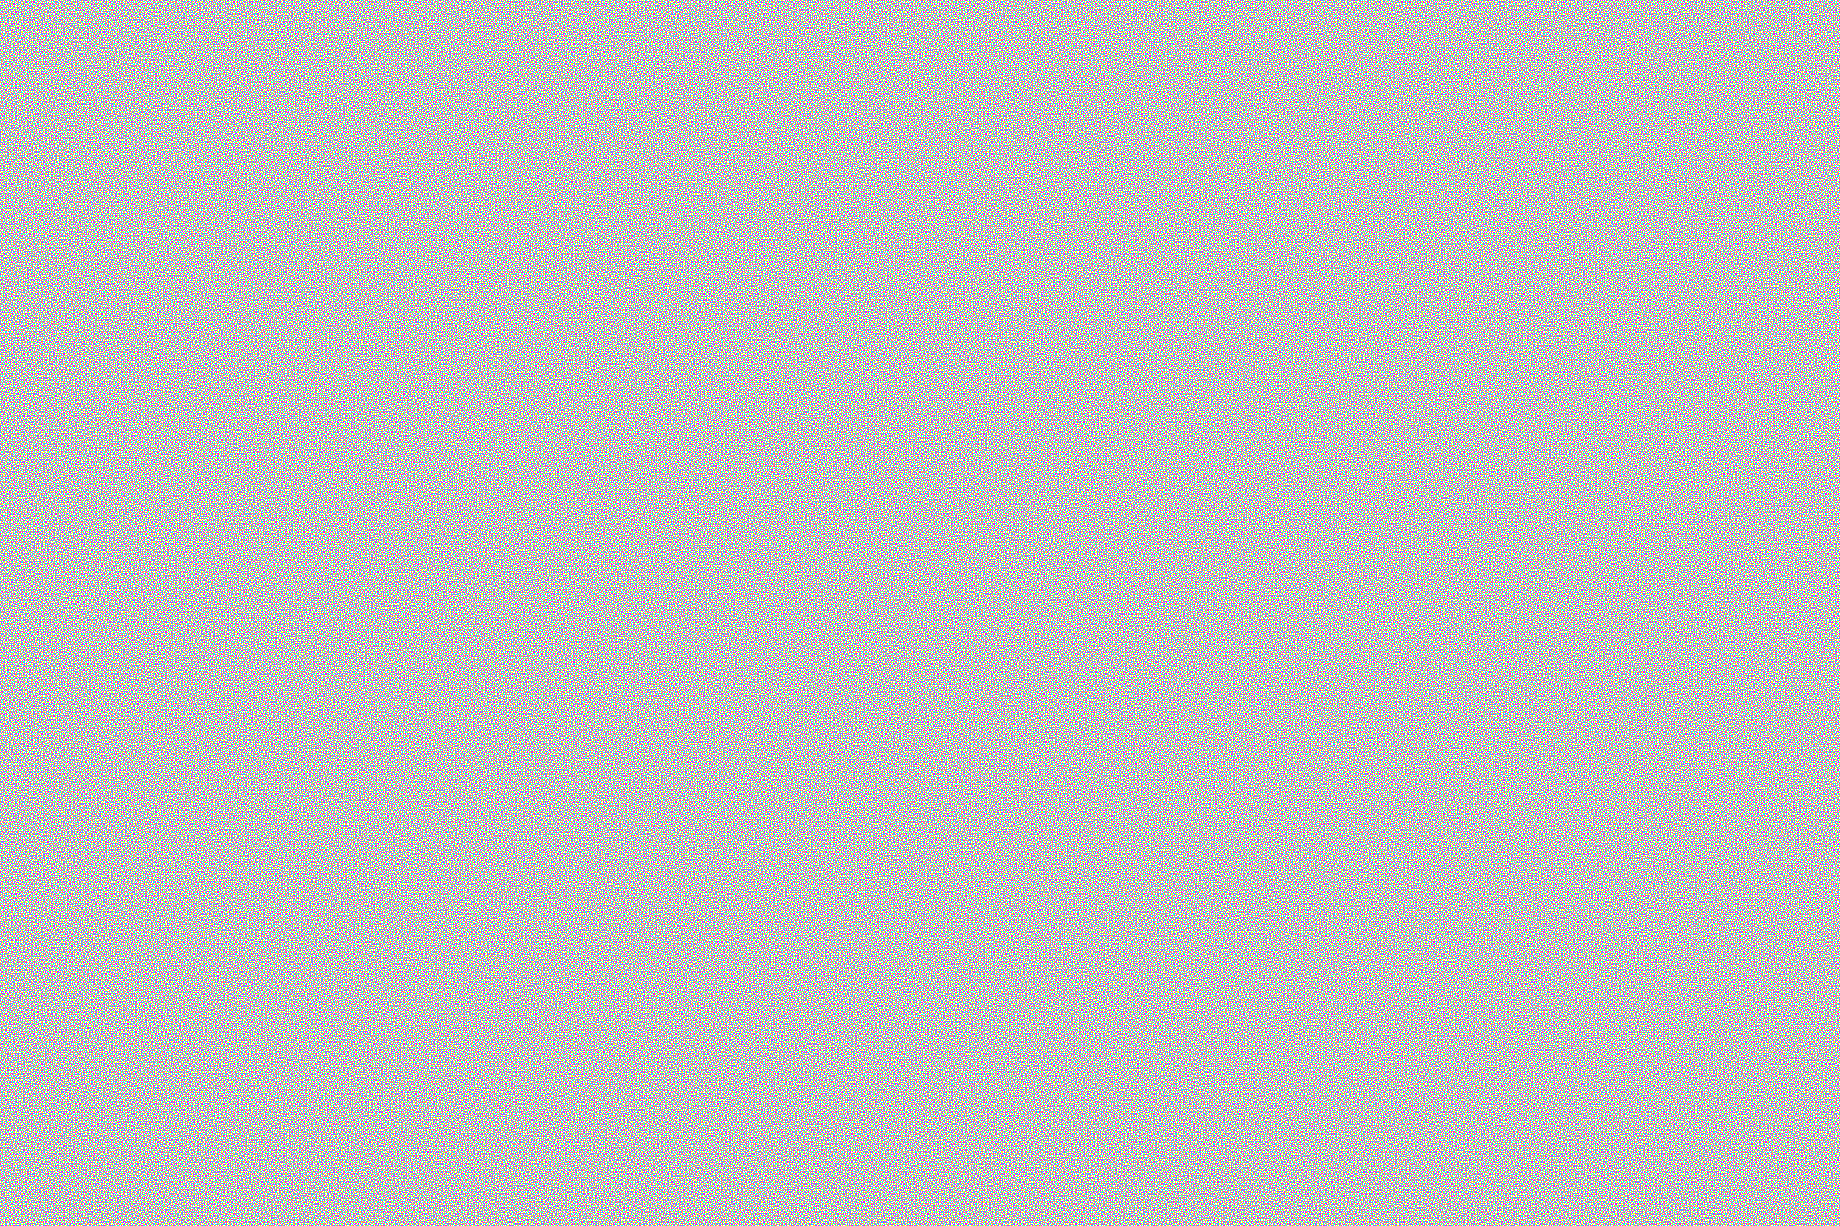

In [ ]:
show_image(share1)

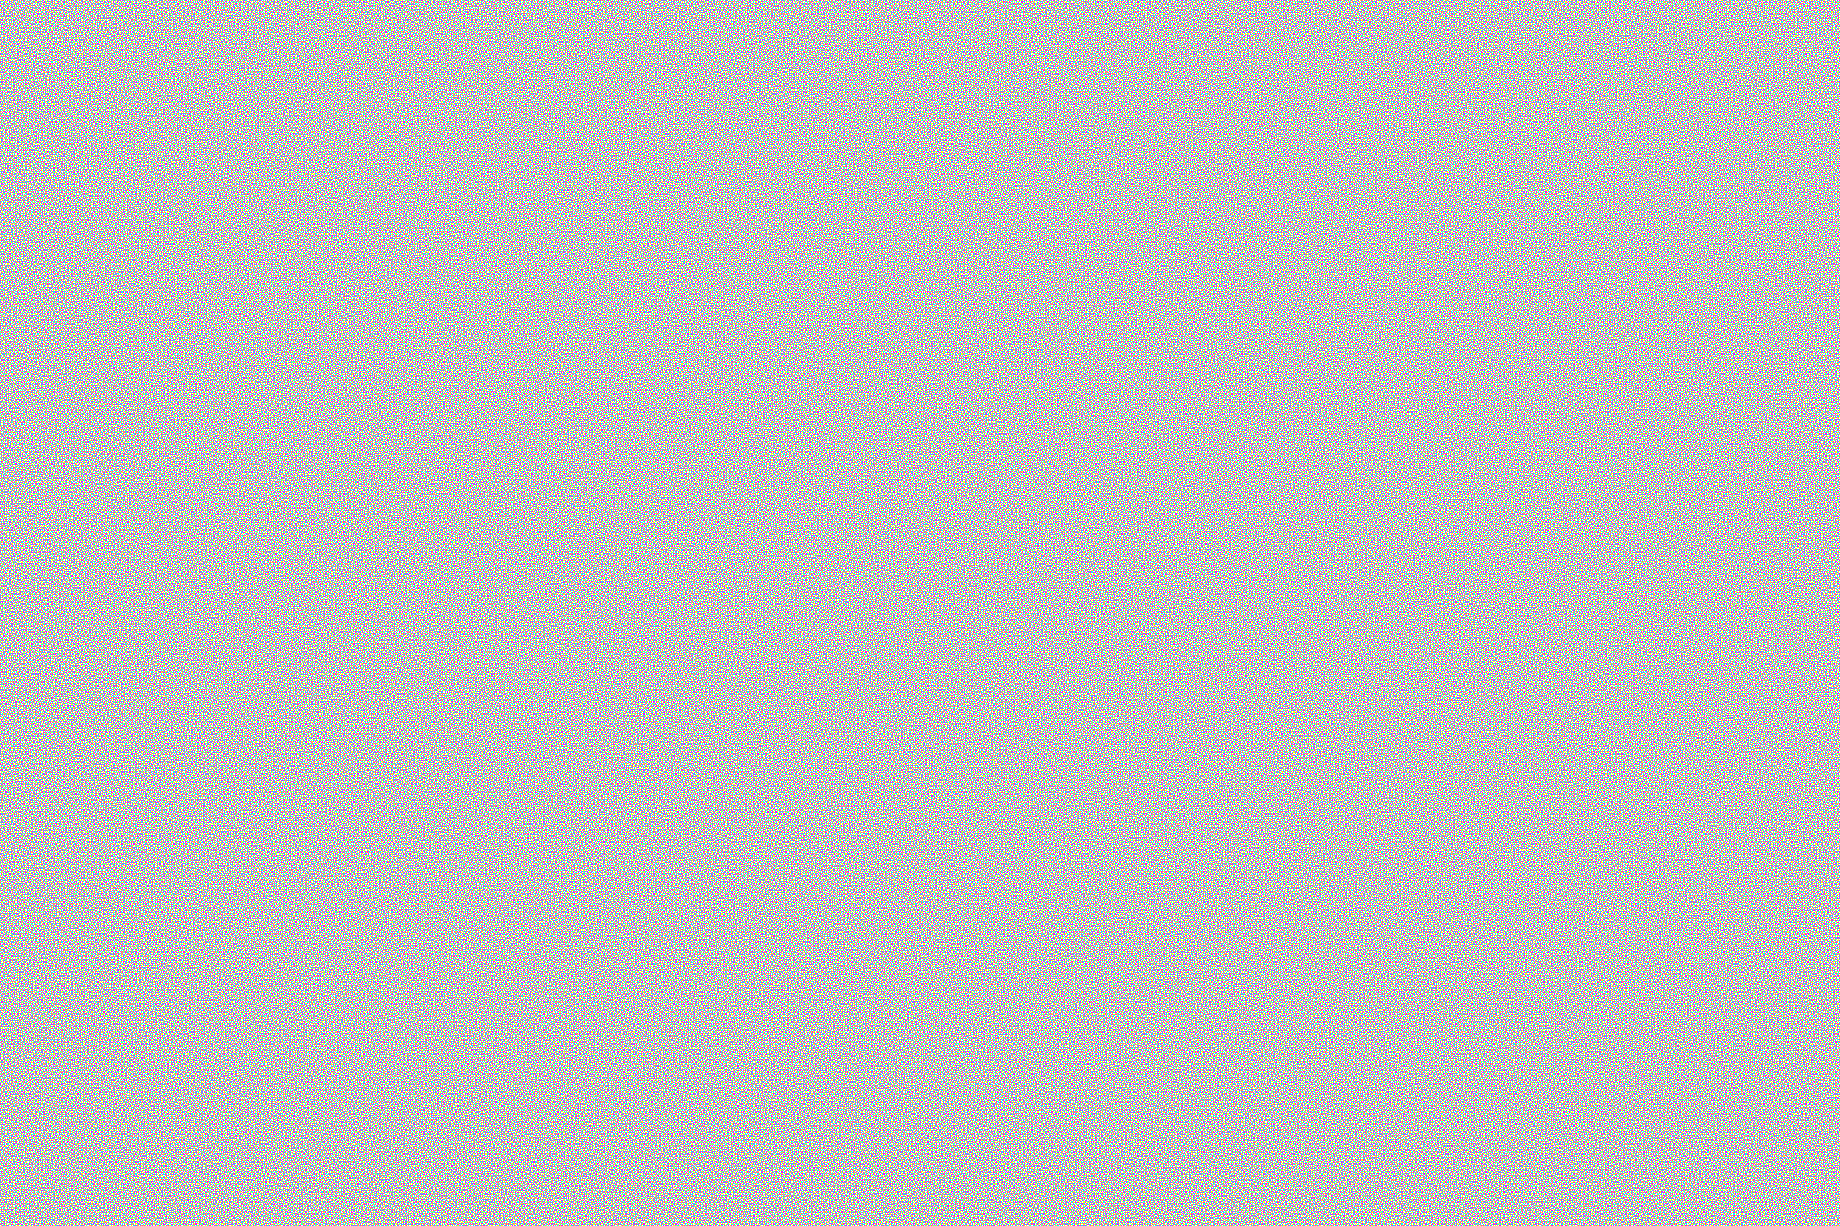

In [ ]:
show_image(share2)


# Decryption

In [ ]:
def decrypt(share1,share2):
  

    dec_img = Image.new('CMYK', share1.size)

    for x in range(0,share1.size[0]):
        for y in range(0,share1.size[1]):

            pix1 = share1.getpixel((x, y))
            pix2 = share2.getpixel((x, y))
            pix_final = (pix1[0]|pix2[0], pix1[1]|pix2[1], pix2[2]|pix2[2],0)
            dec_img.putpixel((x, y), pix_final)
            
    return dec_img


In [ ]:
dec_img = decrypt(share1,share2)

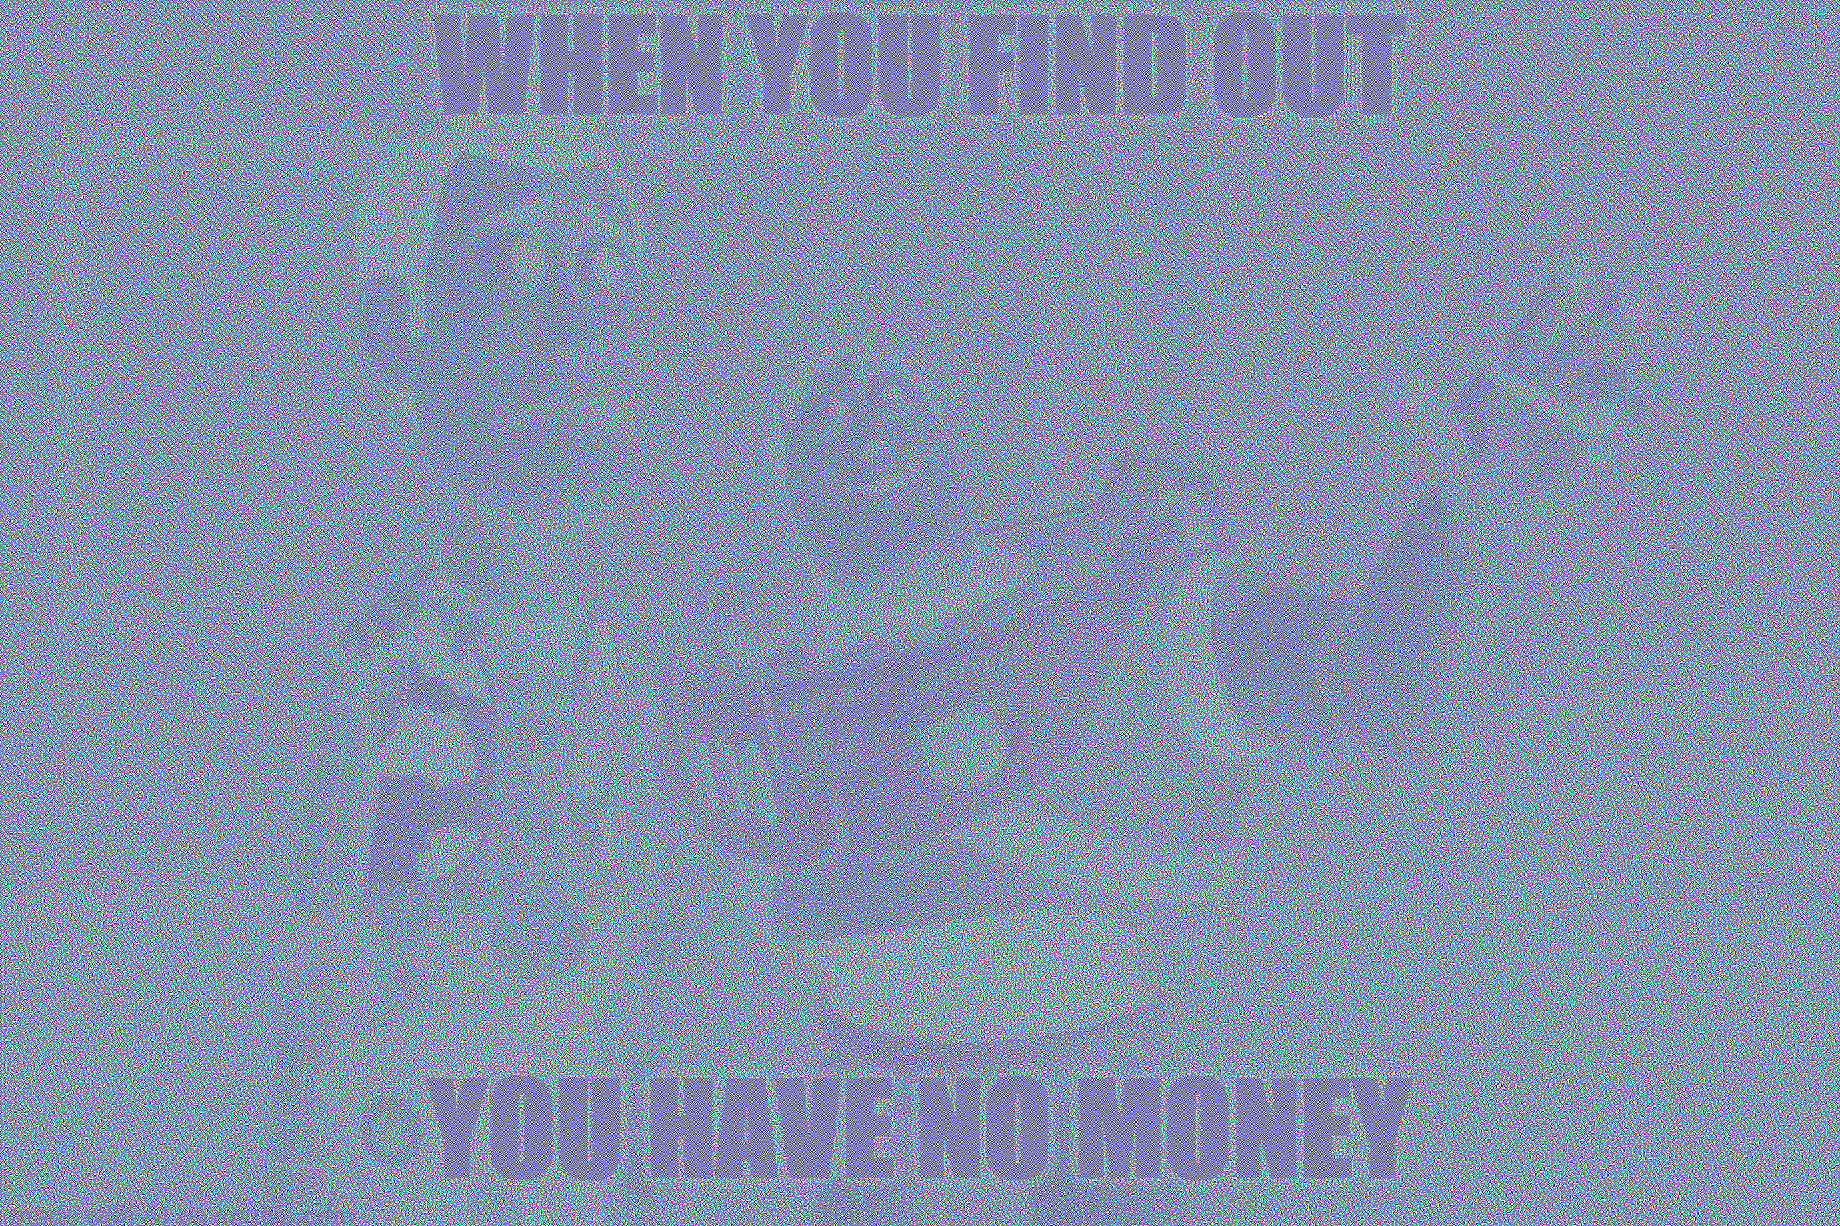

In [ ]:
show_image(dec_img)